In [1]:
# TITLE

### Imports

In [8]:
from nnanno.sample import *
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from pathlib import Path
import re

In [9]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Set plot style

In [10]:
plt.style.use('ggplot')

simple 

# View the amount of data per year

## Loading previous counts 


In [11]:
sampler = nnSampler()

In [12]:
df = sampler.population

## Plotting 

We can use the usual pandas plotting to get an overview of this data

<AxesSubplot:>

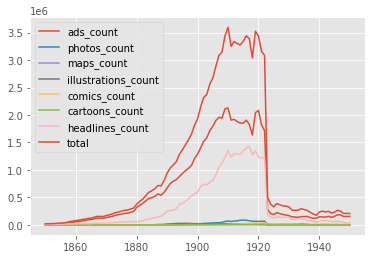

In [13]:
df.plot()

## ads only 

<AxesSubplot:>

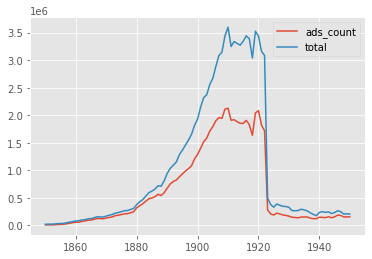

In [14]:
df[['ads_count','total']].plot()

## What does this tell us? 

This chart shows us
- the number of images predicted as adverts (and the total of all images) predicted by the Newspaper Navigator 

There are also a few things which this doesn't show:
- that adverts the number of adverts grew over time. This growth may be explained by more newspapers being published over time, better classifications of adverts by the newspaper navigator algorithm in later years,or a larger body of digitsed material overall in the LOC collection. 

# Creating a sample

### Sampling

We can create a sample from 1850 from the ad dataset, taking 20 samples from each year. This will create a pandas dataframe which collates the JSON information shared in the original Newspaper Navigator dataset. We can inspect this to confirm this is a suitable sample before downloading the actual images. This process will take a little bit of time. The amout of time will be heavily dependent on your internet connection speed, since we have to stream each json file in order to sample it and some of these json files are fairly large (GBs). The time estimate given by the progress bar will jump around quite a bit since `tqdm` (the underlying progress bar library) doesn't know that the amount of time to parse results will grow (as the number of items in each year grows) before falling off at some point (because of the drop off in the amount of data after ~1920). 

In [ ]:
df_ads_1850_1950 = sampler.create_sample(sample_size=20, kind='ads', start_year=1850, end_year=1950, step=1)

In [ ]:
df_ads_1850_1950

We can do the normal dataframe stuff now

In [36]:
df_ads_1850_1950['ocr'].str.len().describe()

count    2020.000000
mean      122.584653
std       194.060333
min         0.000000
25%        33.000000
50%        70.000000
75%       138.000000
max      3271.000000
Name: ocr, dtype: float64

In [39]:
df_ads_1850_1950['place_of_publication'].value_counts()

Washington, D.C.                     278
Indianapolis [Ind.]                   56
New York [N.Y.]                       39
Memphis, Tenn.                        28
Wheeling, W. Va.                      25
                                    ... 
Bisbee, Ariz.                          1
Frederick City, Md.                    1
Pittsburg [Pa.]                        1
Caldwell, Idaho Territory [Idaho]      1
Oroville [Calif.]                      1
Name: place_of_publication, Length: 582, dtype: int64

If we're happy with the sample we can proceed to downloading it. First let's make a folder to store all of the images:

In [74]:
Path('data/ads/').mkdir(exist_ok=True)

Let's save the sample dataframe for later. 

In [77]:
#df_ads_1850_1950.to_json('data/ads/df_ads_1850_1950_sample.json')

In [3]:
df = pd.read_json('data/ads/df_ads_1850_1950_sample.json')

In [4]:
df.head(1)

,filepath,pub_date,page_seq_num,edition_seq_num,batch,lccn,box,score,ocr,place_of_publication,geographic_coverage,name,publisher,url,page_url
0,vi_kernals_ver01/data/sn84024718/00414183736/1850071701/0114/003_6_93.jpg,1850-07-17,114,1,vi_kernals_ver01,sn84024718,"[0.1873145673, 0.9426655205000001, 0.3362990817, 0.9780830839]",0.939579,"[CONGRESS, HALL., So, No., E3, L, iinsM'T, St.,, .1, 2?, Soctii, Thud, Sr.,, PHILADELPHIA., Dec., 19,, U49.-6io.]","Staunton, Va.",[Virginia--Staunton],Staunton spectator. [volume],"L. Waddell, J.A. Waddell",https://news-navigator.labs.loc.gov/data/vi_kernals_ver01/data/sn84024718/00414183736/1850071701/0114/003_6_93.jpg,https://chroniclingamerica.loc.gov/data/batches/vi_kernals_ver01/data/sn84024718/00414183736/1850071701/0114.jp2


# Download sample 

We can no download our sample, we'll create a new subfolder called images to store the images we download. 

In [80]:
Path('data/ads/images').mkdir(parents=True)

We can now use `download_sample` to download the images into this folder. Since we already have a dataframe we want to use we should pass this in as a parameter. Again this will take some time to run, largely bound by your internet speed. 

In [87]:
sample.download_sample('data/ads/images', existing_df=df)

This is a fairly simple function and won't do fancy stuff like automatically keep retrying if you have internet issues etc. It will, however, check if a file has been previously downloaded before so it will pick up where it left off if you run it with the same folder and dataframe. 

# Annotate

# Setup Label Studio

```bash
cd data/ads/
```

```bash
label-studio init advert_annotations_1850_1950 --template=image_classification --input-path=images --input-format=image-dir --allow-serving-local-files
```

```bash
label-studio start ./advert_annotations_1850_1950
```

# Define the config 

```html
<View>
  <Image name="image" value="$image"></Image>
  <Choices name="choice" toName="image" showInLine="true">
    <Choice value="text-only" background="blue"></Choice>
    <Choice value="illustrations" background="green"></Choice>
  </Choices>
</View>
```

## Annotate! 


# Process annotations

### 

In [5]:
from nnAnnotator import annotate

In [2]:
df = annotate.process_completions('data/ads/advert_annotations_1850_1950/','classification')

In [3]:
df

,created_at,id,lead_time,result,data
0,1599071197,729001,0.904,text-only,in_ellis_ver01_data_sn82015313_00383348948_192...
1,1599076083,683001,4.881,illustrations,idhi_bagrati_ver02_data_sn89055184_00414211720...
2,1599070900,379001,1.123,illustrations,dlc_2goncharova_ver03_data_sn83045462_00280605...
3,1599073614,1659001,2.223,text-only,sdhi_aruba_ver01_data_sn98069092_00415625200_1...
4,1599076164,396001,0.985,text-only,dlc_2isamu_ver01_data_sn83045462_00280605335_1...
...,...,...,...,...,...
2013,1599075410,1508001,4.601,illustrations,ohi_horatio_ver01_data_sn88077244_00280775083_...
2014,1599070180,35001,0.859,text-only,az_dragonfly_ver01_data_sn84024827_00211107194...
2015,1599072889,881001,0.898,text-only,khi_douglas_ver01_data_sn84029690_0021247325A_...
2016,1599075340,182001,1.366,text-only,curiv_knotgrass_ver01_data_sn93051083_00279557...


In [4]:
annotate.export_annotations(df, 'data/ads/ads_1850_1950.csv')

!TODO upload to zendo

## Training a model 

In [1]:
from fastai.vision.all import *

In [5]:
Path('data/ads/model').mkdir(exist_ok=True)

In [6]:
torch.cuda.is_available()

True

In [2]:
df_ads = pd.read_csv('data/ads/ads_1850_1950.csv')
df_ads

,file,label
0,in_ellis_ver01_data_sn82015313_00383348948_1926100401_0292_004_6_97.jpg,text-only
1,idhi_bagrati_ver02_data_sn89055184_00414211720_1917080201_0205_000_6_99.jpg,illustrations
2,dlc_2goncharova_ver03_data_sn83045462_0028060513A_1948102401_0163_008_6_94.jpg,illustrations
3,sdhi_aruba_ver01_data_sn98069092_00415625200_1906021501_0189_004_6_99.jpg,text-only
4,dlc_2isamu_ver01_data_sn83045462_00280605335_1949102901_0517_015_6_93.jpg,text-only
...,...,...
2005,ohi_horatio_ver01_data_sn88077244_00280775083_1867041001_0887_000_6_93.jpg,illustrations
2006,az_dragonfly_ver01_data_sn84024827_00211107194_1908091001_0077_001_6_96.jpg,text-only
2007,khi_douglas_ver01_data_sn84029690_0021247325A_1921120801_0283_003_6_98.jpg,text-only
2008,curiv_knotgrass_ver01_data_sn93051083_00279557517_1859020501_0105_000_6_96.jpg,text-only


In [3]:
dls = ImageDataLoaders.from_df(df_ads, path='data/ads/images/', 
                               bs=16,
                               item_tfms=Resize(500),
                               batch_tfms=[*aug_transforms(size=224,max_warp=0)])

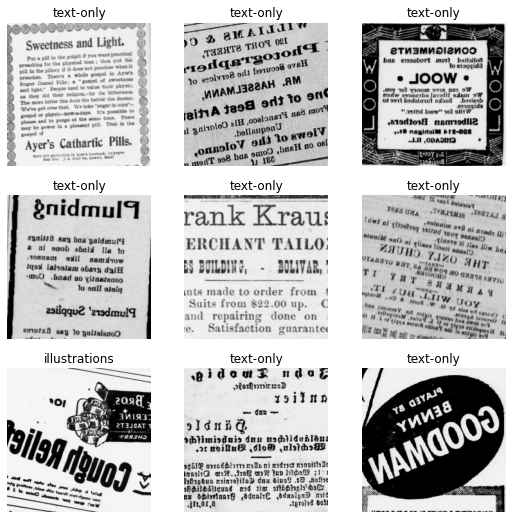

In [4]:
dls.show_batch()

In [10]:
learn = cnn_learner(dls, densenet121, metrics=[accuracy, F1Score()])

In [11]:
learn.path = Path('data/ads/model/')

SuggestedLRs(lr_min=0.0019054606556892395, lr_steep=0.0002754228771664202)

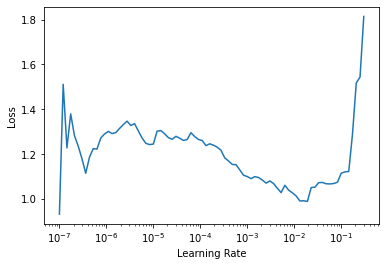

In [12]:
learn.lr_find()

In [13]:
learn.fit_one_cycle(10, lr_max=3e-3)

epoch,train_loss,valid_loss,accuracy,f1_score,time
0,0.872376,0.465150,0.873134,0.899408,00:39
1,0.743869,0.435587,0.828358,0.855346,00:38
2,0.517971,0.324101,0.870647,0.896825,00:38
3,0.470990,0.412384,0.890547,0.916981,00:38
4,0.436868,0.358072,0.858209,0.888016,00:38
5,0.394433,0.348752,0.890547,0.915709,00:38
6,0.338613,0.277599,0.898010,0.921606,00:38
7,0.316874,0.265732,0.910448,0.931559,00:38
8,0.299439,0.257525,0.910448,0.931559,00:38
9,0.284590,0.258003,0.907960,0.929524,00:39


### Diachronic validation 

At the moment the validation data is randomly created as a percentage of our dataframe. Since this dataset covers 100 years we might want to make sure our model performs equally well accross all those years. Let's adjust the dataframe to ensure that the validation set coverage isn't skewed towards particular years. 

In [17]:
df_ads

,file,label
0,in_ellis_ver01_data_sn82015313_00383348948_1926100401_0292_004_6_97.jpg,text-only
1,idhi_bagrati_ver02_data_sn89055184_00414211720_1917080201_0205_000_6_99.jpg,illustrations
2,dlc_2goncharova_ver03_data_sn83045462_0028060513A_1948102401_0163_008_6_94.jpg,illustrations
3,sdhi_aruba_ver01_data_sn98069092_00415625200_1906021501_0189_004_6_99.jpg,text-only
4,dlc_2isamu_ver01_data_sn83045462_00280605335_1949102901_0517_015_6_93.jpg,text-only
...,...,...
2005,ohi_horatio_ver01_data_sn88077244_00280775083_1867041001_0887_000_6_93.jpg,illustrations
2006,az_dragonfly_ver01_data_sn84024827_00211107194_1908091001_0077_001_6_96.jpg,text-only
2007,khi_douglas_ver01_data_sn84029690_0021247325A_1921120801_0283_003_6_98.jpg,text-only
2008,curiv_knotgrass_ver01_data_sn93051083_00279557517_1859020501_0105_000_6_96.jpg,text-only


In [22]:
import re

In [6]:
df2 = annotate.anno_sample_merge(df, df_ads)

In [7]:
df2

,filepath,pub_date,page_seq_num,edition_seq_num,batch,lccn,box,score,ocr,place_of_publication,geographic_coverage,name,publisher,url,page_url,file,label,id
0,vi_kernals_ver01/data/sn84024718/00414183736/1850071701/0114/003_6_93.jpg,1850-07-17,114,1,vi_kernals_ver01,sn84024718,"[0.1873145673, 0.9426655205000001, 0.3362990817, 0.9780830839]",0.939579,"[CONGRESS, HALL., So, No., E3, L, iinsM'T, St.,, .1, 2?, Soctii, Thud, Sr.,, PHILADELPHIA., Dec., 19,, U49.-6io.]","Staunton, Va.",[Virginia--Staunton],Staunton spectator. [volume],"L. Waddell, J.A. Waddell",https://news-navigator.labs.loc.gov/data/vi_kernals_ver01/data/sn84024718/00414183736/1850071701/0114/003_6_93.jpg,https://chroniclingamerica.loc.gov/data/batches/vi_kernals_ver01/data/sn84024718/00414183736/1850071701/0114.jp2,vi_kernals_ver01_data_sn84024718_00414183736_1850071701_0114_003_6_93.jpg,text-only,vi_kernals_ver01/data/sn84024718/00414183736/1850071701/0114/003_6_93.jpg
1,scu_henryjohnson_ver01/data/sn84026912/00211109981/1850041901/0192/007_6_91.jpg,1850-04-19,192,1,scu_henryjohnson_ver01,sn84026912,"[0.4073786741, 0.4324236077, 0.5956960177, 0.5009488103]",0.914896,"[The, Bridge, across, Little, River,, uear, Jas., JV., Morgan's, is, thought, to, be, and, 1, propose, to, let, out, the, or, re-building, it,, nt, the, place,, on, Saturday, tha, 4th, Mny, next,, at, 10, o'clock,, a., m., MILES, M., NORTON., /?(li, /lr?r?1*7, 1, nw, til]","Pickens Court House, S.C.","[South Carolina--Oconee--Walhalla, South Carolina--Pickens--Pickens]",Keowee courier. [volume],W.H. Trimmier,https://news-navigator.labs.loc.gov/data/scu_henryjohnson_ver01/data/sn84026912/00211109981/1850041901/0192/007_6_91.jpg,https://chroniclingamerica.loc.gov/data/batches/scu_henryjohnson_ver01/data/sn84026912/00211109981/1850041901/0192.jp2,scu_henryjohnson_ver01_data_sn84026912_00211109981_1850041901_0192_007_6_91.jpg,text-only,scu_henryjohnson_ver01/data/sn84026912/00211109981/1850041901/0192/007_6_91.jpg
2,in_indianapolisolympians_ver02/data/sn86058217/00271744766/1850081401/0547/001_6_91.jpg,1850-08-14,547,1,in_indianapolisolympians_ver02,sn86058217,"[0.6807854206, 0.8276131534000001, 0.8119330963, 0.8906370084]",0.918696,"[WE17, GOODS., 1X7, E, would, respectfully, inform, the, People,, w, that, we, are, now, receiving, onr, EAST, ERN, SPRING, and, SUMMER, STOCK, of, mer, chandize;, which,, together, with, our, former, stock, makes, our, assortment, COMPLETE., All, of, which, we, are, offering, at, exceedingly, law, prices, for, cash,, or, any, kind, of, available, produce., SCOTT, St, Co., Richmond,, April, 10th,, 1850., 16tf]","Richmond, IA [i.e. Ind.]",[Indiana--Wayne--Richmond],Richmond palladium. [volume],D.P. Holloway & B.W. Davis,https://news-navigator.labs.loc.gov/data/in_indianapolisolympians_ver02/data/sn86058217/00271744766/1850081401/0547/001_6_91.jpg,https://chroniclingamerica.loc.gov/data/batches/in_indianapolisolympians_ver02/data/sn86058217/00271744766/1850081401/0547.jp2,in_indianapolisolympians_ver02_data_sn86058217_00271744766_1850081401_0547_001_6_91.jpg,text-only,in_indianapolisolympians_ver02/data/sn86058217/00271744766/1850081401/0547/001_6_91.jpg
3,vtu_foxville_ver01/data/sn84023200/00280777614/1850042501/0070/001_6_90.jpg,1850-04-25,70,1,vtu_foxville_ver01,sn84023200,"[0.1767596553, 0.6901713539000001, 0.3009807854, 0.9656075799]",0.909868,"[., 7-, 7, ..HVllkl, LIST, QF, LETRS, REUAlNIKGiBthaPoftUSca, it, KonhfieU,, April, law., A., Attrj,, Cbarka, 8, B., BAaaiaterSalljr, Caiiail, ,, Andre, w, B.aca,, A., T.i, Booxk,, tduod, IIoIomi,, John, iU, -, K., KiialoiU,&W., KiabaUIy, 11, array, ., 1., Latbam,Orta, ,, Littla,, Georfo, F..3,, 1-ucr,, Larium, M., LimmdIi,, Viml!, Jb.M.iiaea, O, M., "", 'Mubaai,t1nl, 6., ., i., Metuid.rMiebaotl, iuaet, William, r., B.ao""., Ira, Bule., tVm., C-, CatBp!ol!a, Eoiilf, &poall., tVClum, C'otl.r,, V, Canw., H,, 11, ., ,, ', Uaiwe., CiDriiuo,, IMaaa.., Jan.., p, -, 'Odirar.', loots, (Ma,, IV., Ll....","Montpelier, Vt.",[Vermont--Washingto

In [7]:
def get_og_filepath(x):
    """
    Transforms the filepaths exported from Image Studio back to the Orginal Newspaper Navigator filepath format
    """
    b, m, e = re.split('(_data_)',x)
    m = m.replace('_','/')
    e = re.split('(\d{3}_\d{1}_\d{2}.jpg)',e)
    return b+m+e[0].replace('_','/') +e[1]

In [8]:
df_ads['id'] = df_ads['file'].map(lambda x:get_og_filepath(x))

In [9]:
df_new = df.merge(df_ads, left_on='filepath',right_on='id')


In [10]:
df_new

,filepath,pub_date,page_seq_num,edition_seq_num,batch,lccn,box,score,ocr,place_of_publication,geographic_coverage,name,publisher,url,page_url,file,label,id
0,vi_kernals_ver01/data/sn84024718/00414183736/1850071701/0114/003_6_93.jpg,1850-07-17,114,1,vi_kernals_ver01,sn84024718,"[0.1873145673, 0.9426655205000001, 0.3362990817, 0.9780830839]",0.939579,"[CONGRESS, HALL., So, No., E3, L, iinsM'T, St.,, .1, 2?, Soctii, Thud, Sr.,, PHILADELPHIA., Dec., 19,, U49.-6io.]","Staunton, Va.",[Virginia--Staunton],Staunton spectator. [volume],"L. Waddell, J.A. Waddell",https://news-navigator.labs.loc.gov/data/vi_kernals_ver01/data/sn84024718/00414183736/1850071701/0114/003_6_93.jpg,https://chroniclingamerica.loc.gov/data/batches/vi_kernals_ver01/data/sn84024718/00414183736/1850071701/0114.jp2,vi_kernals_ver01_data_sn84024718_00414183736_1850071701_0114_003_6_93.jpg,text-only,vi_kernals_ver01/data/sn84024718/00414183736/1850071701/0114/003_6_93.jpg
1,scu_henryjohnson_ver01/data/sn84026912/00211109981/1850041901/0192/007_6_91.jpg,1850-04-19,192,1,scu_henryjohnson_ver01,sn84026912,"[0.4073786741, 0.4324236077, 0.5956960177, 0.5009488103]",0.914896,"[The, Bridge, across, Little, River,, uear, Jas., JV., Morgan's, is, thought, to, be, and, 1, propose, to, let, out, the, or, re-building, it,, nt, the, place,, on, Saturday, tha, 4th, Mny, next,, at, 10, o'clock,, a., m., MILES, M., NORTON., /?(li, /lr?r?1*7, 1, nw, til]","Pickens Court House, S.C.","[South Carolina--Oconee--Walhalla, South Carolina--Pickens--Pickens]",Keowee courier. [volume],W.H. Trimmier,https://news-navigator.labs.loc.gov/data/scu_henryjohnson_ver01/data/sn84026912/00211109981/1850041901/0192/007_6_91.jpg,https://chroniclingamerica.loc.gov/data/batches/scu_henryjohnson_ver01/data/sn84026912/00211109981/1850041901/0192.jp2,scu_henryjohnson_ver01_data_sn84026912_00211109981_1850041901_0192_007_6_91.jpg,text-only,scu_henryjohnson_ver01/data/sn84026912/00211109981/1850041901/0192/007_6_91.jpg
2,in_indianapolisolympians_ver02/data/sn86058217/00271744766/1850081401/0547/001_6_91.jpg,1850-08-14,547,1,in_indianapolisolympians_ver02,sn86058217,"[0.6807854206, 0.8276131534000001, 0.8119330963, 0.8906370084]",0.918696,"[WE17, GOODS., 1X7, E, would, respectfully, inform, the, People,, w, that, we, are, now, receiving, onr, EAST, ERN, SPRING, and, SUMMER, STOCK, of, mer, chandize;, which,, together, with, our, former, stock, makes, our, assortment, COMPLETE., All, of, which, we, are, offering, at, exceedingly, law, prices, for, cash,, or, any, kind, of, available, produce., SCOTT, St, Co., Richmond,, April, 10th,, 1850., 16tf]","Richmond, IA [i.e. Ind.]",[Indiana--Wayne--Richmond],Richmond palladium. [volume],D.P. Holloway & B.W. Davis,https://news-navigator.labs.loc.gov/data/in_indianapolisolympians_ver02/data/sn86058217/00271744766/1850081401/0547/001_6_91.jpg,https://chroniclingamerica.loc.gov/data/batches/in_indianapolisolympians_ver02/data/sn86058217/00271744766/1850081401/0547.jp2,in_indianapolisolympians_ver02_data_sn86058217_00271744766_1850081401_0547_001_6_91.jpg,text-only,in_indianapolisolympians_ver02/data/sn86058217/00271744766/1850081401/0547/001_6_91.jpg
3,vtu_foxville_ver01/data/sn84023200/00280777614/1850042501/0070/001_6_90.jpg,1850-04-25,70,1,vtu_foxville_ver01,sn84023200,"[0.1767596553, 0.6901713539000001, 0.3009807854, 0.9656075799]",0.909868,"[., 7-, 7, ..HVllkl, LIST, QF, LETRS, REUAlNIKGiBthaPoftUSca, it, KonhfieU,, April, law., A., Attrj,, Cbarka, 8, B., BAaaiaterSalljr, Caiiail, ,, Andre, w, B.aca,, A., T.i, Booxk,, tduod, IIoIomi,, John, iU, -, K., KiialoiU,&W., KiabaUIy, 11, array, ., 1., Latbam,Orta, ,, Littla,, Georfo, F..3,, 1-ucr,, Larium, M., LimmdIi,, Viml!, Jb.M.iiaea, O, M., "", 'Mubaai,t1nl, 6., ., i., Metuid.rMiebaotl, iuaet, William, r., B.ao""., Ira, Bule., tVm., C-, CatBp!ol!a, Eoiilf, &poall., tVClum, C'otl.r,, V, Canw., H,, 11, ., ,, ', Uaiwe., CiDriiuo,, IMaaa.., Jan.., p, -, 'Odirar.', loots, (Ma,, IV., Ll....","Montpelier, Vt.",[Vermont--Washingto

In [44]:
df_new['pub_date'].str.split('-').str[0].values

array(['1850', '1850', '1850', ..., '1950', '1950', '1950'], dtype=object)

In [43]:
from sklearn.model_selection import train_test_split

In [61]:
train_df, valid_df = train_test_split(df_new, test_size=0.2, stratify=df_new['pub_date'].str.split('-').str[0].values)

In [63]:
train_df.loc['is_valid'] = False

/data/anaconda/envs/nnAnnotator/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [64]:
valid_df['is_valid'] = True

<ipython-input-64-49df83ba4c5b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df['is_valid'] = True


In [ ]:
dfmerged =p 

In [14]:
interp = ClassificationInterpretation.from_learner(learn)

In [31]:
doc(interp.plot_top_losses)

Interpretation.plot_top_losses [source] Interpretation.plot_top_losses ( k , largest = True , ** kwargs ) 
 
 Show in docs

In [25]:
a[0][0], a[1][0]

(tensor(6.1740), tensor(112))

In [34]:
a[1][0]

tensor(112)

In [40]:
interp.print_classification_report()

               precision    recall  f1-score   support

illustrations       0.90      0.77      0.83       145
    text-only       0.88      0.95      0.92       257

     accuracy                           0.89       402
    macro avg       0.89      0.86      0.87       402
 weighted avg       0.89      0.89      0.89       402



In [1]:
from nnAnnotator import sample